In [ ]:
# 버젼 검사
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
import pandas as pd

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train_path = '/content/drive/MyDrive/취업사관학교 팀플_청와대 청원 분류 /공모전/데이터/감성대화말뭉치(최종데이터)_Training.xlsx'
origin_data = pd.read_excel(train_path)

print(origin_data.tail(3))



          번호   연령  성별 상황키워드    신체질환 감정_대분류   감정_소분류  \
40876  36344  청소년  여성  가족관계    해당없음     슬픔      우울한   
40877  14197   노년  여성    재정  만성질환 무     기쁨     감사하는   
40878  16248   청년  남성  대인관계    해당없음     불안  스트레스 받는   

                                           사람문장1  \
40876  엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.   
40877    이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.   
40878        친구 관계가 너무 힘들어. 베푸는 만큼 돌아오지 않는 것 같아.   

                                           시스템응답1  \
40876     어머니의 응원이 사라져서 슬프시겠어요. 조금 더 자세히 말해주시겠어요?   
40877                  운동 시설을 쓸 수 있어서 기분이 좋으시겠어요.   
40878  많이 서운하셨겠어요. 친구들에게 서운함을 느꼈을 때 해결하는 방법이 있나요?   

                                                   사람문장2  \
40876   내 재능이 남들보다 월등한 거는 아니라면서 취업해서 안정적으로 살았으면 좋겠다고 하셔.   
40877  덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...   
40878                 카페에 가서 대화하거나 같이 술 마시면서 이야기했던 것 같아.   

                                              시스템응답2  \
40876                         이 상황에서 무엇을 시도해 보고 싶나요?   
4087

In [ ]:
#모양, 컬럼 확인
print(origin_data.shape)
print(origin_data.columns)

(40879, 15)
Index(['번호', '연령', '성별', '상황키워드', '신체질환', '감정_대분류', '감정_소분류', '사람문장1',
       '시스템응답1', '사람문장2', '시스템응답2', '사람문장3', '시스템응답3', '사람문장4', '시스템응답4'],
      dtype='object')


In [ ]:
#감정_대분류, 사람문장1, 사람문장2, 사람문장3, 사람문장4만 남기고 지우기
#새로운 변수로 저장
df = origin_data.drop(["번호","연령","성별","상황키워드","신체질환","감정_소분류","시스템응답1","시스템응답2","시스템응답3","시스템응답4"], axis=1)
df.head()

,감정_대분류,사람문장1,사람문장2,사람문장3,사람문장4
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,NaN
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,NaN
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,회사생활을 열심히 해서 계속 월급을 받을거야!,NaN
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,NaN,NaN


In [ ]:
#결측값을 공백으로 대체
df = df.fillna(' ')
df

,감정_대분류,사람문장1,사람문장2,사람문장3,사람문장4
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,회사생활을 열심히 해서 계속 월급을 받을거야!,
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,,
...,...,...,...,...,...
40874,불안,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,나한테 아예 떠넘길 거 같은데 친구한테 얘기해볼까 고민 중이야.,이대로 내가 키우게 되면 안 되니까 확실하게 해야겠어.,친구가 자기가 데려온 강아지에 대해 책임감을 갖고 스스로 잘 돌봤으면 좋겠어.
40875,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,결과가 좋게 나와서 다행이야,,
40876,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,내 재능이 남들보다 월등한 거는 아니라면서 취업해서 안정적으로 살았으면 좋겠다고 하셔.,내가 다시 내 꿈을 어떻게 이룰 것인지 자세히 설명해 드려야겠어.,
40877,기쁨,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,운동으로 뭉친 근육을 풀어주는 것 같아. 그럼 덜 피로하겠지.,


In [ ]:
#"사람문장~"컬럼 4개를 sentence라는 새 컬럼으로 합치기

df["sentence"] = df["사람문장1"] + " " + df["사람문장2"] + " " + df["사람문장3"] + " " + df["사람문장4"] + " "
df

,감정_대분류,사람문장1,사람문장2,사람문장3,사람문장4,sentence
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,회사생활을 열심히 해서 계속 월급을 받을거야!,,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,,,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...
...,...,...,...,...,...,...
40874,불안,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,나한테 아예 떠넘길 거 같은데 친구한테 얘기해볼까 고민 중이야.,이대로 내가 키우게 되면 안 되니까 확실하게 해야겠어.,친구가 자기가 데려온 강아지에 대해 책임감을 갖고 스스로 잘 돌봤으면 좋겠어.,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...
40875,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,결과가 좋게 나와서 다행이야,,,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어. 결과가 좋게 나와서 다...
40876,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,내 재능이 남들보다 월등한 거는 아니라면서 취업해서 안정적으로 살았으면 좋겠다고 하셔.,내가 다시 내 꿈을 어떻게 이룰 것인지 자세히 설명해 드려야겠어.,,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼. 내 재능...
40877,기쁨,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,운동으로 뭉친 근육을 풀어주는 것 같아. 그럼 덜 피로하겠지.,,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야. 덕분에 건강...


In [ ]:
df = df.drop(["사람문장1","사람문장2","사람문장3","사람문장4"], axis=1)
df

,감정_대분류,sentence
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...
...,...,...
40874,불안,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...
40875,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어. 결과가 좋게 나와서 다...
40876,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼. 내 재능...
40877,기쁨,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야. 덕분에 건강...


In [ ]:
#컬럼 이름 바꾸기
df.columns = ["category","sentence"]
df.head(3)

,category,sentence
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...


In [ ]:
#결측값 포함된 행 전체 제거
#결측값 없음

df.isnull().sum()


category    0
sentence    0
dtype: int64

In [ ]:
#category에 공백 제거
df['category'] = df['category'].str.strip()

In [ ]:
#감정 단어 숫자로 변환: 이 과정 없으면 토큰화 과정에서 integer error발생 
df.loc[(df['category'] == "기쁨"), 'category'] = 0  #기쁨 => 0
df.loc[(df['category'] == "당황"), 'category'] = 1  #당황 => 1
df.loc[(df['category'] == "분노"), 'category'] = 2  #분노 => 2
df.loc[(df['category'] == "불안"), 'category'] = 3  #불안 => 3
df.loc[(df['category'] == "상처"), 'category'] = 4  #상처 => 4
df.loc[(df['category'] == "슬픔"), 'category'] = 5  #슬픔 => 5

df["category"].head(10)


0    0
1    3
2    1
3    0
4    0
5    3
6    5
7    2
8    2
9    5
Name: category, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40879 non-null  object
 1   sentence  40879 non-null  object
dtypes: object(2)
memory usage: 638.9+ KB


In [ ]:
#형변환에러(interger) 방지하는 차원에서 감정이 제대로 숫자로 변환되었나 확인
print(len(df.loc[(df['category'] == 0)])+len(df.loc[(df['category'] == 1)])+len(df.loc[(df['category'] == 2)])+len(df.loc[(df['category'] == 3)])+len(df.loc[(df['category'] == 4)])+len(df.loc[(df['category'] == 5)]))

40879


In [ ]:
#category가 objects
df.dtypes

category    object
sentence    object
dtype: object

In [ ]:
#형변환 오류 방지를 위해 category를 integer 형태로 바꿔줌
df = df.astype({'category':'int'})

In [ ]:
print(df.info())

# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40879 non-null  int64 
 1   sentence  40879 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.9+ KB
None


In [ ]:
#통계 보고
df["category"].count()

40879

### 단어추출

In [ ]:
# !pip install soynlp
# !pip show soynlp
import pandas as pd
import numpy as np
import re #정규표현식: 전처리에서 텍스트 데이터 다룰 때 필수 사용 

# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from matplotlib import rc

# %matplotlib inline

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
df["sentence"] = df["sentence"].str.replace(pat=r'[.]', repl=r'', regex=True)

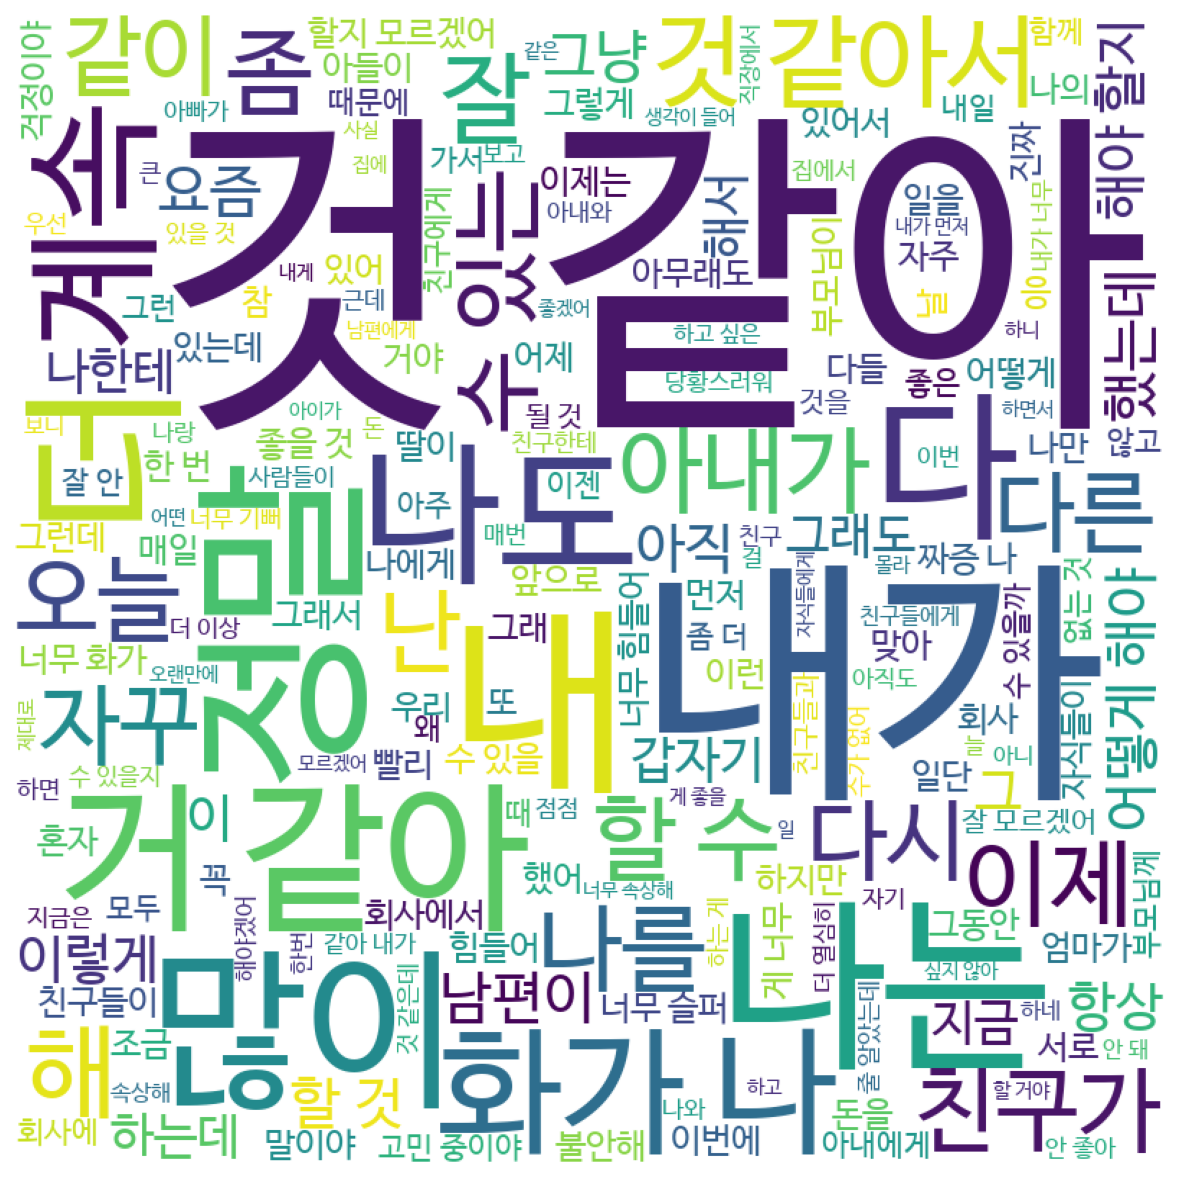

In [ ]:
 # 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. 문장 데이터를 단어화하기
for val in df['sentence']:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800, 
                font_path=fontpath,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# 토큰화된 문장확인
tokenized_text[0]

['아내가',
 '드디어',
 '출산하게',
 '되어서',
 '정말',
 '신이',
 '나',
 '아',
 '지금',
 '정말',
 '신이',
 '나',
 '아기가',
 '점점',
 '클게',
 '벌써',
 '기대가',
 '되네',
 '내가',
 '많이',
 '놀아줘야지']

In [ ]:
len(tokenized_text)

40879

In [ ]:
# 새로운 불용어와 기존 불용어 필터링하기

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)
        
  return tokenized_filtered

In [ ]:
stopwords_2 = (["아내가"])

In [ ]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [ ]:
# 필터링 되었는지 확인
tokenized_filtered[0:15]

['드디어',
 '출산하게',
 '되어서',
 '정말',
 '신이',
 '나',
 '아',
 '지금',
 '정말',
 '신이',
 '나',
 '아기가',
 '점점',
 '클게',
 '벌써']

In [ ]:
len(tokenized_filtered)

1042714

In [ ]:
# 각 단어가 얼마나 나왔는지 카운트해보기

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # 많이 나온 순서대로 정렬

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))
  
  return sorted_dict

In [ ]:
tokenized_dict = word_count(tokenized_filtered)

In [ ]:
# 가장 상위 10개의 단어 보기
def top_10(tokenized_dict):
  top_10_words = list(tokenized_dict.items())[:10]
  return top_10_words

top_10(tokenized_dict)

[('너무', 14557),
 ('것', 11877),
 ('내가', 11305),
 ('같아', 10754),
 ('안', 8165),
 ('내', 8144),
 ('나', 5797),
 ('수', 5711),
 ('더', 5570),
 ('게', 5183)]

In [ ]:
# 필터링할 추가적인 stopwords들 정의

stopwords_2 = (["내가", "것", "같아", "이제", "오늘", "그냥", "다시", "하지만",
             "그래도", "그런데", "나도", "아직도", "될 것", "것 같아", "때", "응", 
             "이렇게", "그리고", "지금", "너무", "정말", "많이", "할 것",
             "안", "내", "수", "더", "게", "잘", "할", "나는", "하고", "해", "거야",
             "나를", "못", "그","어떻게", "잘", "싶어", "친구가", "좀",
               "거", "다", "나", "있는", "때문에", "다른", "해서",
               "하는", "요즘", "있어", "없어", "한", "우리", "왜", "해야", "난", "이", "같이", 
               "않아", "걸", "일을", "마음이", "말을", "자꾸", "기분이", "일이","할지",
               "했는데", "같아서", "계속", "돈을", "해야겠어", "하는데", "봐", "날", 
               "들어", "있는데", "했어", "봐", "아내가", "그런", "그래서", "건", "사람이", "나만", "돼", "없어서", "친구들이", 
               "없는", "것도", "줄", "맞아", "먼저", "나한테", "아직", "남편이", "갑자기", "돈이", "것이", "이런",
               "항상", "있어서", "회사", "보고", "가서", "회사에서", "나에게", "하면",
               "생각이", "앞으로", "같아", "일단", "같은", "될", "이번", "있을",
               "나이가", "아들이", "대화를", "싶은데", "친구에게", "않고", "친구를", "없이",
               "다들", "보면", "큰", "함께", "좋을", "이야기를", "중이야",
               "봐야겠어", "집에", "위해", "그렇게", "친구", "해", "빨리", "하지", "엄마가", "들어", "이번에",
               "보니", "다들", "매일", "또", "아무래도", "대해", "혼자", "열심히", "모르겠어"


])

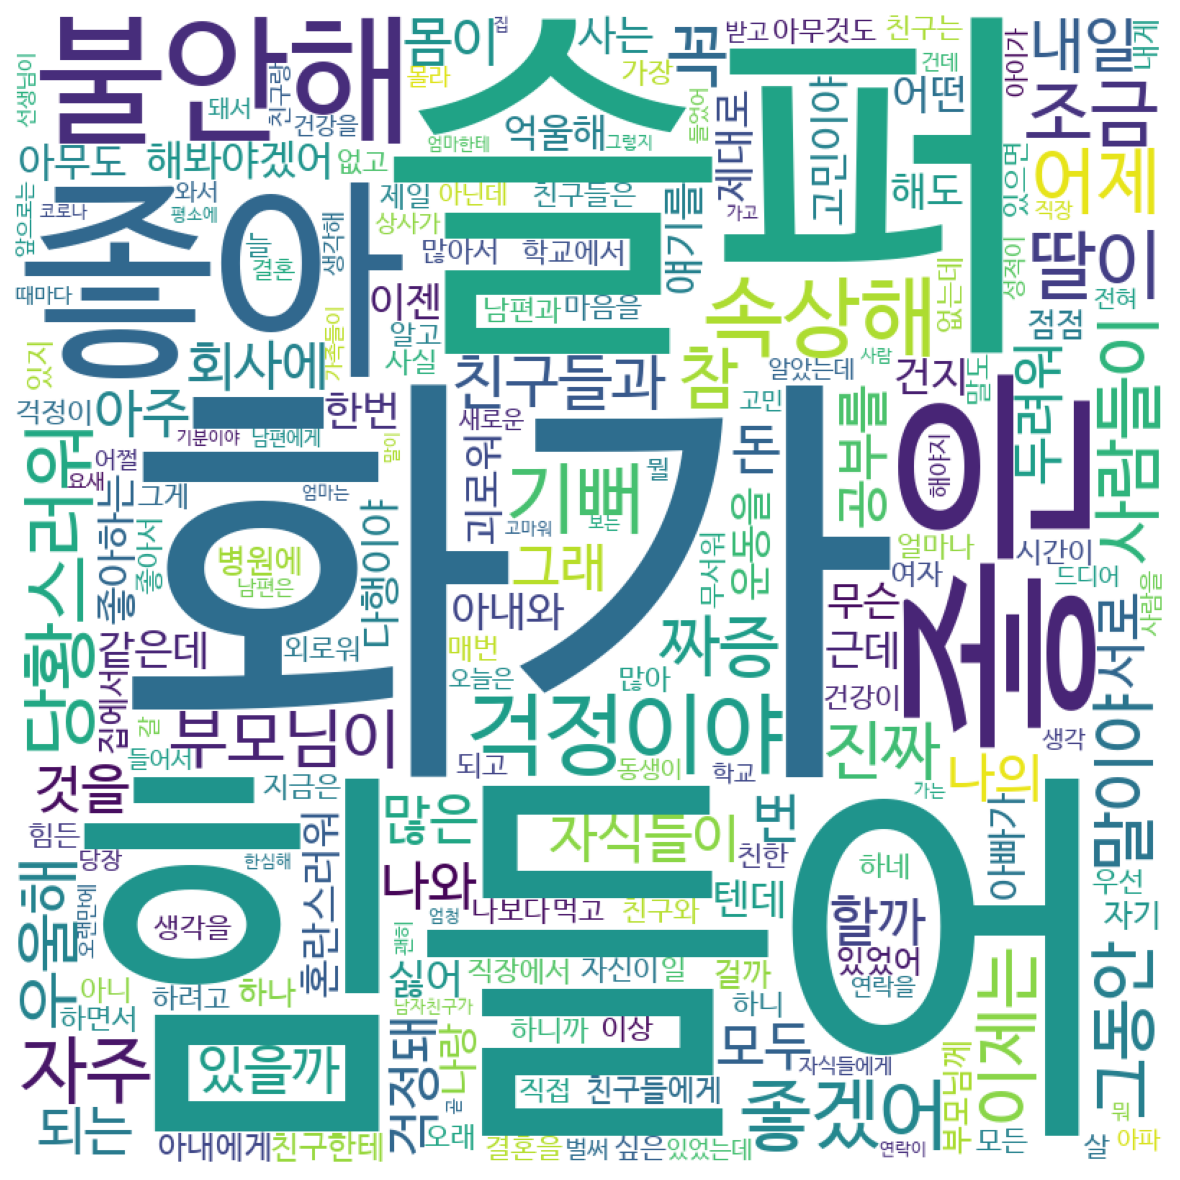

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                font_path=fontpath,
                background_color ='white', 
                stopwords = stopwords_2, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

tokenized_dict = word_count(tokenized_filtered)

# 가장 상위 10개의 단어 보기
top_10(tokenized_dict)

[('화가', 2314),
 ('좋은', 2294),
 ('힘들어', 1621),
 ('좋겠어', 1539),
 ('슬퍼', 1456),
 ('좋아', 1355),
 ('불안해', 1214),
 ('걱정이야', 1197),
 ('속상해', 1085),
 ('기뻐', 856)]

In [ ]:
chart = top_10(tokenized_dict)

In [ ]:
display(chart)

[('화가', 2314),
 ('좋은', 2294),
 ('힘들어', 1621),
 ('좋겠어', 1539),
 ('슬퍼', 1456),
 ('좋아', 1355),
 ('불안해', 1214),
 ('걱정이야', 1197),
 ('속상해', 1085),
 ('기뻐', 856)]

In [ ]:
df = pd.DataFrame(chart)

In [ ]:
#컬럼 이름 바꾸기
df.columns = ["emotion","count"]
df

,emotion,count
0,화가,2314
1,좋은,2294
2,힘들어,1621
3,좋겠어,1539
4,슬퍼,1456
5,좋아,1355
6,불안해,1214
7,걱정이야,1197
8,속상해,1085
9,기뻐,856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  10 non-null     object
 1   count    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text

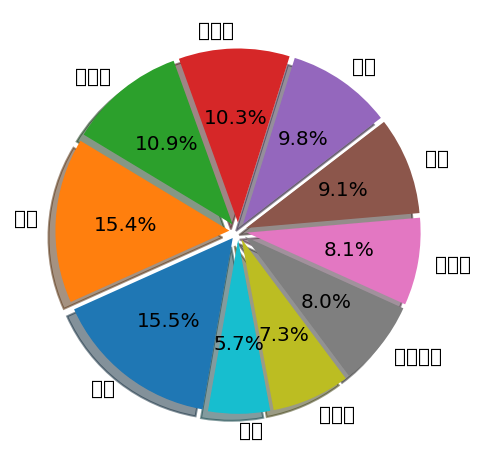

In [ ]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.pie(df['count'], labels=df['emotion'], autopct='%.1f%%', explode = explode, startangle=260, counterclock=False, shadow=True)
plt.show